# Домашнее задание к занятию «Поиск выбросов и генерация новых признаков»

**Преподаватель:** Наталья Баданина, Юлия Пономарева

**Задание**

**Цель:**

Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

**Описание задания:**

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно [скачать](https://www.kaggle.com/uciml/glass) с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**Этапы работы:**



1. **Получение данных и загрузка в рабочую среду**:
   - Получите данные и загрузите их в рабочую среду, например, Jupyter Notebook или Google Colab.

2. **Проведение первичного анализа**:

   а) Проверьте количество записей для каждого класса и сделайте вывод.
   
3. **Разделение выборки на обучающее и тестовое подмножество**:
   - Разделите данные на обучающее и тестовое подмножества в соотношении 80% на обучающее и 20% на тестовое.

4. **Обучение модели дерева решений RandomForestClassifier**:
   - Обучите модель дерева решений RandomForestClassifier на обучающем наборе данных.

5. **Оценка точности модели**:
   - Предскажите тип стекла для тестового множества и сравните с истинным значением. Рассчитайте точность предсказания модели.

6. **Обработка выбросов в данных**:

   а) Визуализируйте распределение значений для каждой переменной с помощью функций sns.boxplot, sns.distplot. Определите, есть ли признаки с нормальным распределением.

   b) Исследуйте признаки на наличие выбросов несколькими способами.

   c) Удалите выбросы из данных и посчитайте процент удаленных записей от общего числа записей для каждого класса.

7. **Повторное обучение модели и оценка точности после обработки выбросов**:
   - Повторно обучите модель RandomForestClassifier на обучающем наборе после удаления выбросов.
   - Оцените точность новой модели на тестовом наборе данных.

8. **Сформулировать выводы по проделанной работе**:

   а) Опишите преобразования, проведенные с данными.

   b) Сравните точность двух моделей: до и после обработки выбросов.

   c) Выразите свое мнение о необходимости исследования данных на выбросы, обсудите плюсы и минусы такого подхода.


### Этап 1: Получение данных и загрузка в рабочую среду

In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Rabota_s_priznakami_i_postroenie_modelej/Poisk_vybrosov/glass.csv"
df = pd.read_csv(url)

print(df.head())
print(df.info())
print(df.describe())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
     

**Атрибуты:**
1. **RI** (показатель преломления) - числовой признак, который является непрерывным значением.
2. **Na** (натрий) - числовой признак, представленный весовым процентом в соответствующем оксиде.
3. **Mg** (магний) - числовой признак, также в весовом проценте.
4. **Al** (алюминий) - числовой признак, представленный весовым процентом.
5. **Si** (кремний) - числовой признак, представленный весовым процентом.
6. **K** (калий) - числовой признак, процент содержания калия.
7. **Ca** (кальций) - числовой признак, процент содержания кальция.
8. **Ba** (барий) - числовой признак, процент содержания бария.
9. **Fe** (железо) - числовой признак, процент содержания железа.

**Целевая переменная:**
10. **Type** (тип стекла) - категориальный признак, определяющий тип стекла. У него 7 уникальных значений:


1. **building_windows_float_processed** - стекло для строительных окон с обработкой плавления. Вероятно, это стекло используется в оконных конструкциях зданий.
2. **building_windows_non_float_processed** - стекло для строительных окон без обработки плавления. Этот тип стекла, возможно, используется в оконных рамах другого типа.
3. **vehicle_windows_float_processed** - стекло для автомобильных окон с обработкой плавления. Вероятно, это стекло устанавливается в автомобилях.
4. **vehicle_windows_non_float_processed** - стекло для автомобильных окон без обработки плавления (отсутствует в этой базе данных).
5. **containers** - стекло для контейнеров. Этот тип стекла, скорее всего, используется для производства стеклянной тары.
6. **tableware** - стекло для посуды. Вероятно, это стекло используется для изготовления посуды.
7. **headlamps** - стекло для фар. Этот тип стекла, вероятно, используется для изготовления фар автомобилей.

Анализируя статистики, можно сделать следующие выводы:
- Для атрибутов RI, Na, Mg, Al, Si значения среднего и медианы близки друг к другу, что показывает отсутствие существенных выбросов.
- Для атрибутов с более высоким стандартным отклонением (например, Ca), можно дополнительно оценить данные на предмет выбросов.
- В целом, распределение данных по атрибутам весьма стабильное, и отклонения от среднего значения не являются значительными.

### Этап 2: Проведение первичного анализа

In [28]:
data = df

In [29]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [30]:
# Пропущенные значения в != 'object':
for column in data.columns:
    if data[column].dtype != 'object':
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values[:10]}...\n")  # Отображает первые 10 уникальных значений для краткости

В столбце 'RI' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'RI': [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755]...

В столбце 'Na' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Na': [13.64 13.89 13.53 13.21 13.27 12.79 13.3  13.15 14.04 13.  ]...

В столбце 'Mg' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Mg': [4.49 3.6  3.55 3.69 3.62 3.61 3.58 3.46 3.66 3.43]...

В столбце 'Al' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Al': [1.1  1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.56]...

В столбце 'Si' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Si': [71.78 72.73 72.99 72.61 73.08 72.97 73.09 73.24 72.08 73.2 ]...

В столбце 'K' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'K': [0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.56 0.67 0.6 ]...

В столбце 'Ca' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Ca': [8.75 7.83 7.78 8.22

Данные соответствуют описанию. 4-класса нет как и сказано в описании.

- 2.1 Проверим количество записей для каждого класса

In [31]:
class_counts = data['Type'].value_counts()
print(class_counts)

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


Исходя из этих результатов, можно увидеть, что в датасете представлены данные для шести различных классов стекла. Классы не распределены равномерно, что может повлиять на работу алгоритмов машинного обучения, особенно если какой-то класс имеет значительно меньшее количество записей, чем другие.

Для обеспечения более сбалансированных данных при обучении моделей, иногда требуется воспользоваться методами балансировки классов, такими как увеличение числа записей для менее представленных классов (oversampling) или уменьшение для более представленных (undersampling), либо использование алгоритмов, способных работать с несбалансированными данными. Это важно для получения правильных и устойчивых результатов от моделей машинного обучения.

Используем `RandomUnderSampler` для уменьшения представленных классов в наших данных:

In [32]:
from imblearn.under_sampling import RandomUnderSampler

# Определение признаков и целевой переменной
X = data.drop('Type', axis=1)
y = data['Type']

# Создание объекта RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Применение RandomUnderSampler к данным
X_resampled, y_resampled = rus.fit_resample(X, y)

# Проверка количества записей после undersampling
print(pd.Series(y_resampled).value_counts())

Type
1    9
2    9
3    9
5    9
6    9
7    9
Name: count, dtype: int64


In [33]:
print(X_resampled.shape)
print(y_resampled.shape)

(54, 9)
(54,)


### Этап 3: Разделение выборки на обучающее и тестовое подмножество

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Разделение на обучающее и тестовое подмножество до undersampling
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Разделение на обучающее и тестовое подмножество после undersampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Этап 4: Обучение модели дерева решений RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Создание и обучение модели RandomForestClassifier на данных до undersampling
clf_before = RandomForestClassifier(random_state=42)
clf_before.fit(X_train_before, y_train_before)

RandomForestClassifier(random_state=42)

In [39]:
# Создание и обучение модели RandomForestClassifier после undersampling
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Этап 5: Оценка точности модели

In [40]:
# Оценка точности модели на обучающем наборе до undersampling
train_accuracy_before = clf_before.score(X_train_before, y_train_before)

# Оценка точности модели на тестовом наборе до undersampling
test_accuracy_before = clf_before.score(X_test_before, y_test_before)

# Оценка точности модели на обучающем наборе после undersampling
train_accuracy_after = clf.score(X_train, y_train)

# Оценка точности модели на тестовом наборе после undersampling
test_accuracy_after = clf.score(X_test, y_test)

# Создаем пустую таблицу для метрик
metrics_table = pd.DataFrame(columns=['Модель', 'Точность на обучающем наборе', 'Точность на тестовом наборе'])

# Добавляем метрики для модели до undersampling
metrics_table.loc[0] = ['Модель до undersampling', train_accuracy_before, test_accuracy_before]

# Добавляем метрики для модели после undersampling
metrics_table.loc[1] = ['Модель после undersampling', train_accuracy_after, test_accuracy_after]

# Выводим таблицу на печать
metrics_table

,Модель,Точность на обучающем наборе,Точность на тестовом наборе
0,Модель до undersampling,1.0,0.837209
1,Модель после undersampling,1.0,0.727273


Из полученных результатов точности до и после undersampling видно следующее:

По-видимому, в данном случае возникло переобучение модели после undersampling.


1. **Идеальная точность на обучающем наборе до и после undersampling:** Получение идеальной точности (1.0 или 100%) на обучающем наборе как до, так и после undersampling является сигналом о потенциальном переобучении модели.
2. **Точность на тестовом наборе после undersampling существенно уменьшилась:** Снижение точности после undersampling на тестовом наборе (с 0.837 до 0.727) указывает на то, что модель может переобучаться на обучающем наборе и предсказывать плохо на новых данных.




### После Undersampling:
- **Точность на тестовом наборе после undersampling:** 0.727 (или около 72.7%) показывает снижение точности на тестовом наборе после применения undersampling. Уменьшение точности может объясняться тем, что мы удалили избыточные записи для балансировки классов, что может привести к потере информации и уменьшению обобщающей способности модели.

### Этап 6: Обработка выбросов в данных

#### - 6.1 Визуализация распределения значений для каждой переменной

Распределение (RI) и (Na)

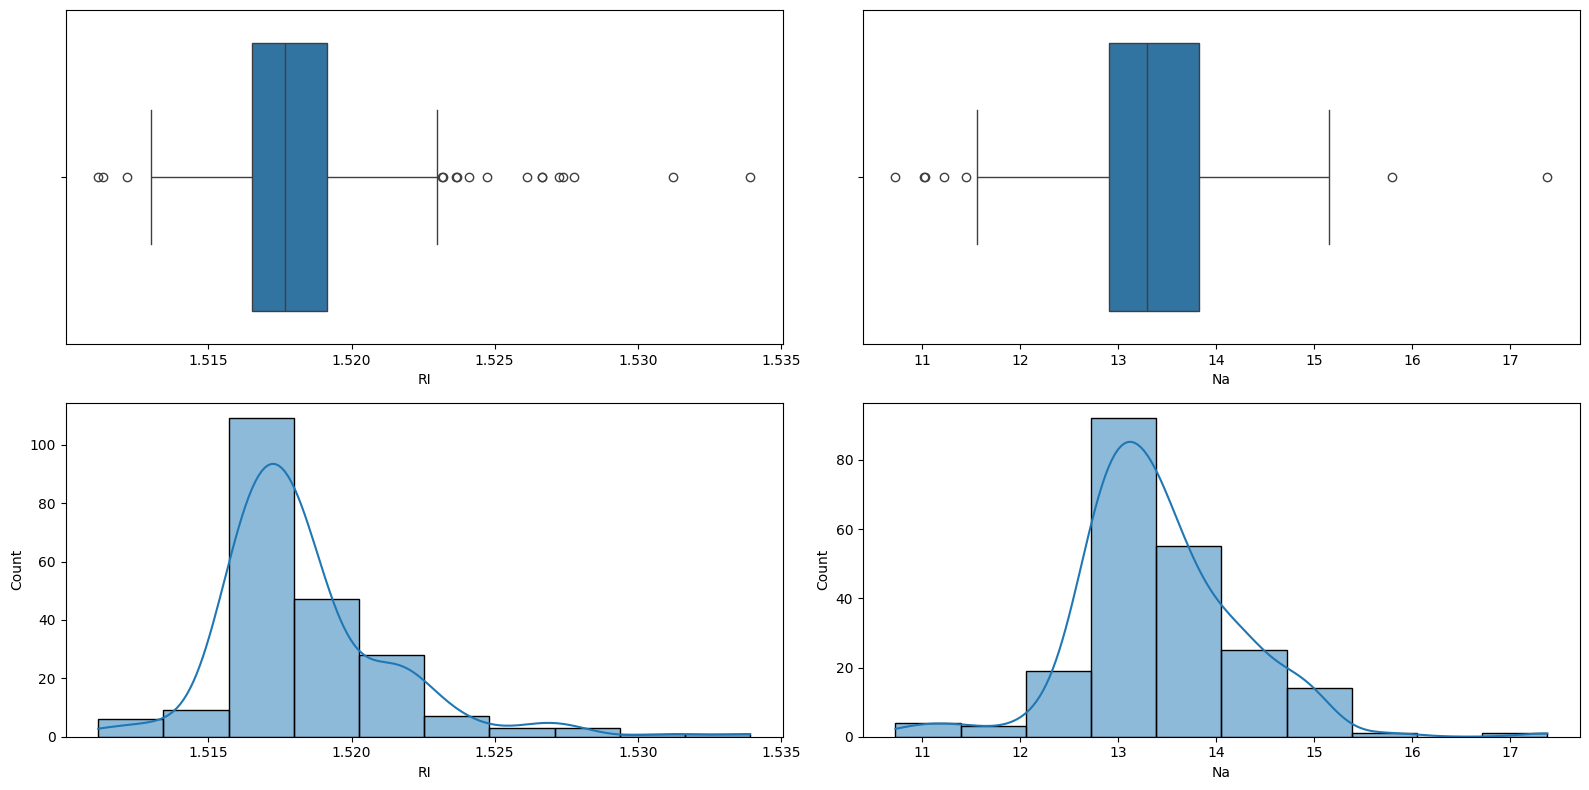

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='RI', data=df)
plt.subplot(2, 2, 3)
sns.histplot(df['RI'], bins=10, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x='Na', data=df)
plt.subplot(2, 2, 4)
sns.histplot(df['Na'], bins=10, kde=True)
plt.tight_layout()
plt.show()


(RI):

- Распределение RI похоже на нормальное из-за узкого диапазона (мин 1.511150 - макс 1.533930) и малой стандартной ошибки (0.003037).
- Незначительное количество выбросов может быть ближе к максимальному или минимальному значению.

(Na):

- Значения Na более разнесены, но в пределах разумного диапазона для нормального распределения.
- Вводные диапазоны (10.730000 - 17.380000) присутствуют в широком распределении.
- Возможны несколько выбросов ближе к мин и макс значениям.

Распределение (Mg) и (Al)

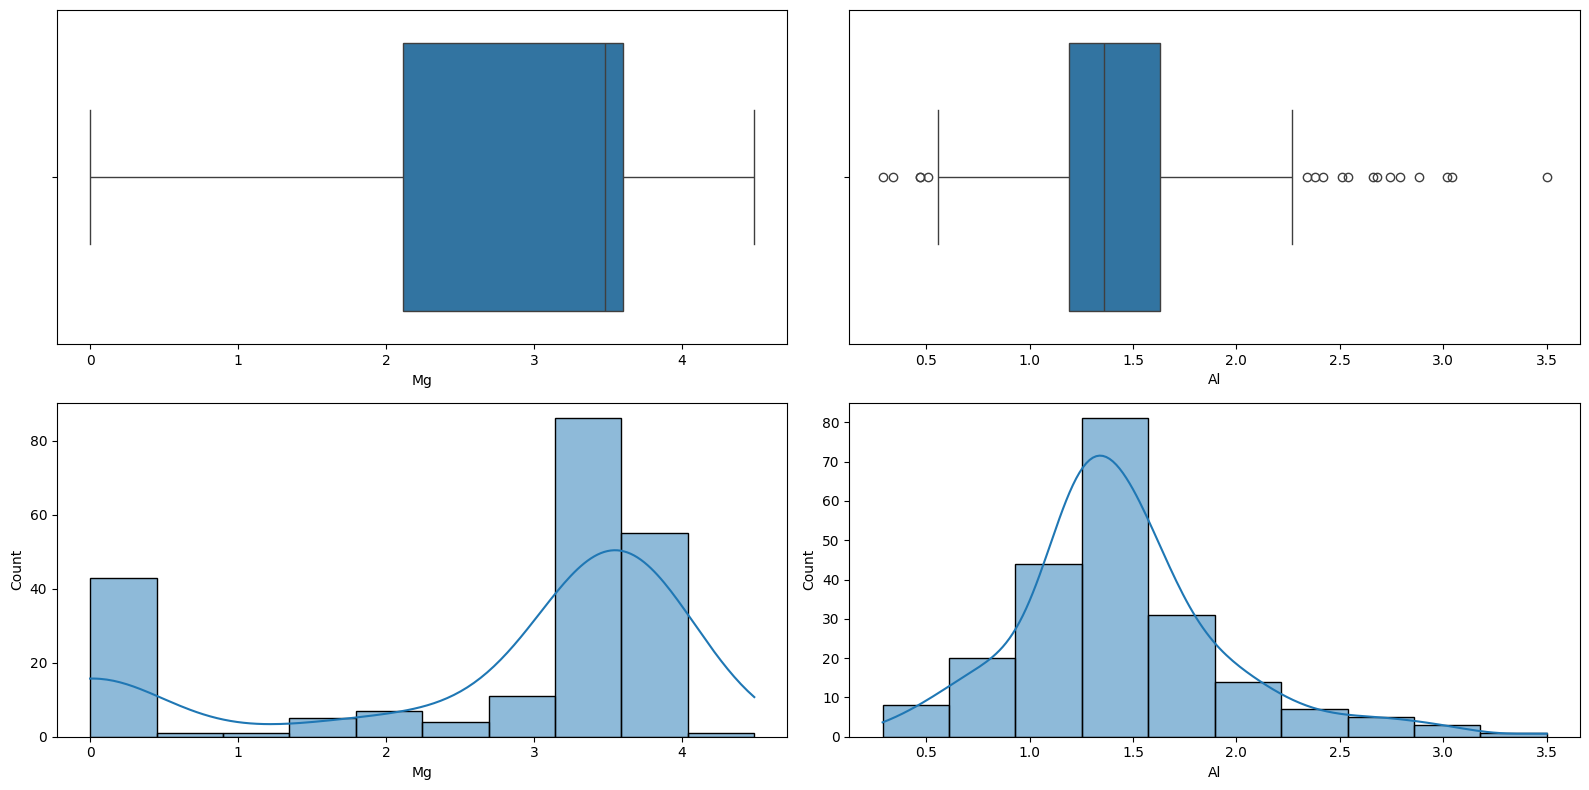

In [42]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Mg', data=df)
plt.subplot(2, 2, 3)
sns.histplot(df['Mg'], bins=10, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x='Al', data=df)
plt.subplot(2, 2, 4)
sns.histplot(df['Al'], bins=10, kde=True)
plt.tight_layout()
plt.show()

(Mg):

- Существенное отклонение в значениях мин и макс указывает на возможные выбросы.
- Широкий разброс значений указывает на ненормальное распределение.

(Al):

- Распределение относительно близко к нормальному, хотя низкие (0.290000) и высокие значения (3.500000) могут	указываться как выборы.


Распределение (Si) и (K)

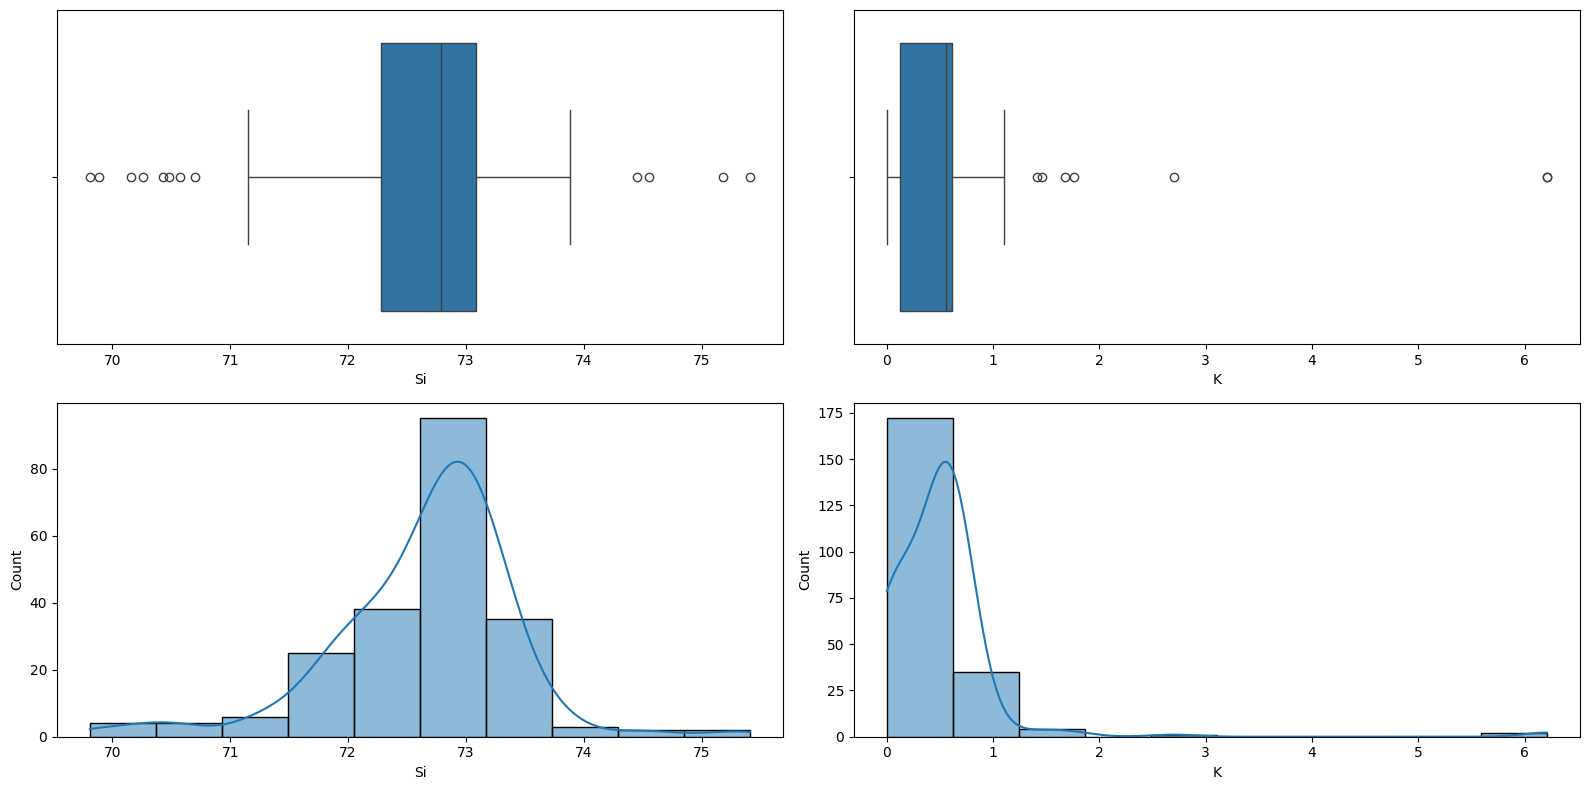

In [43]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Si', data=df)
plt.subplot(2, 2, 3)
sns.histplot(df['Si'], bins=10, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x='K', data=df)
plt.subplot(2, 2, 4)
sns.histplot(df['K'], bins=10, kde=True)
plt.tight_layout()
plt.show()

(Si):

- Диапазон значений относительно узкий, что указывает на нормальное распределение.
- Выбросы возможны около минимальных и максимальных значений.

(K):

- Потенциальные выбросы из-за высокого максимума (6.210000) и большого стандартного отклонения.
- В основном данные распределены в пределах 0-1, высокие значения могут быть выбросами.

Распределение (Ca) и (Ba)

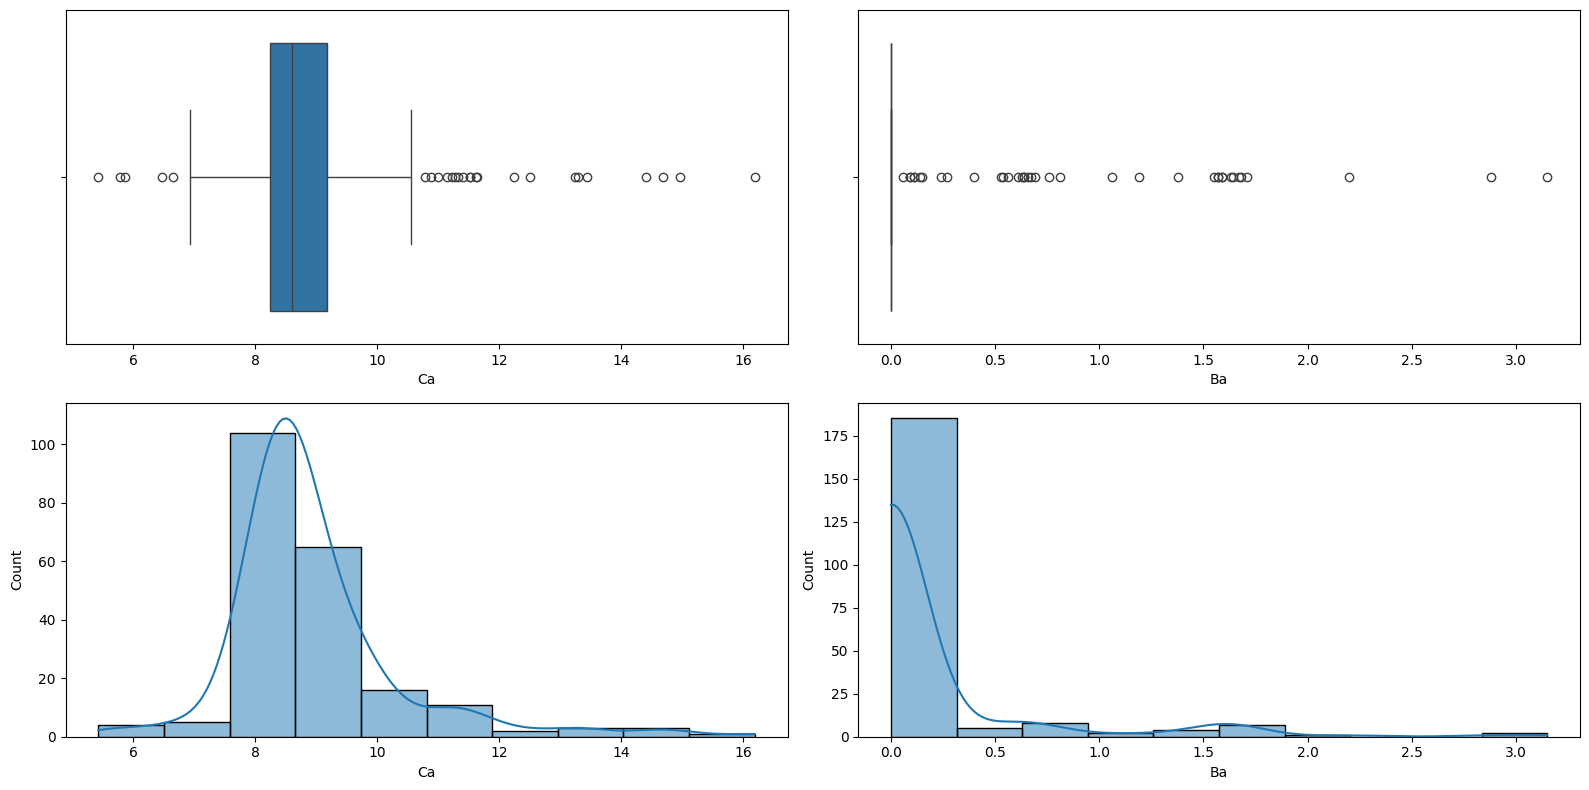

In [44]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Ca', data=df)
plt.subplot(2, 2, 3)
sns.histplot(df['Ca'], bins=10, kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(x='Ba', data=df)
plt.subplot(2, 2, 4)
sns.histplot(df['Ba'], bins=10, kde=True)
plt.tight_layout()
plt.show()

(Ca):
- Вариативность данных указывает на нехватку нормальности, возможные выбросы ближе к максимуму (16.190000).



(Ba):

- Из-за большого количества нулевых значений распределение не является нормальным.
- Высокие значения (~3.150000) четко являются выбросами.

Распределение (Fe)

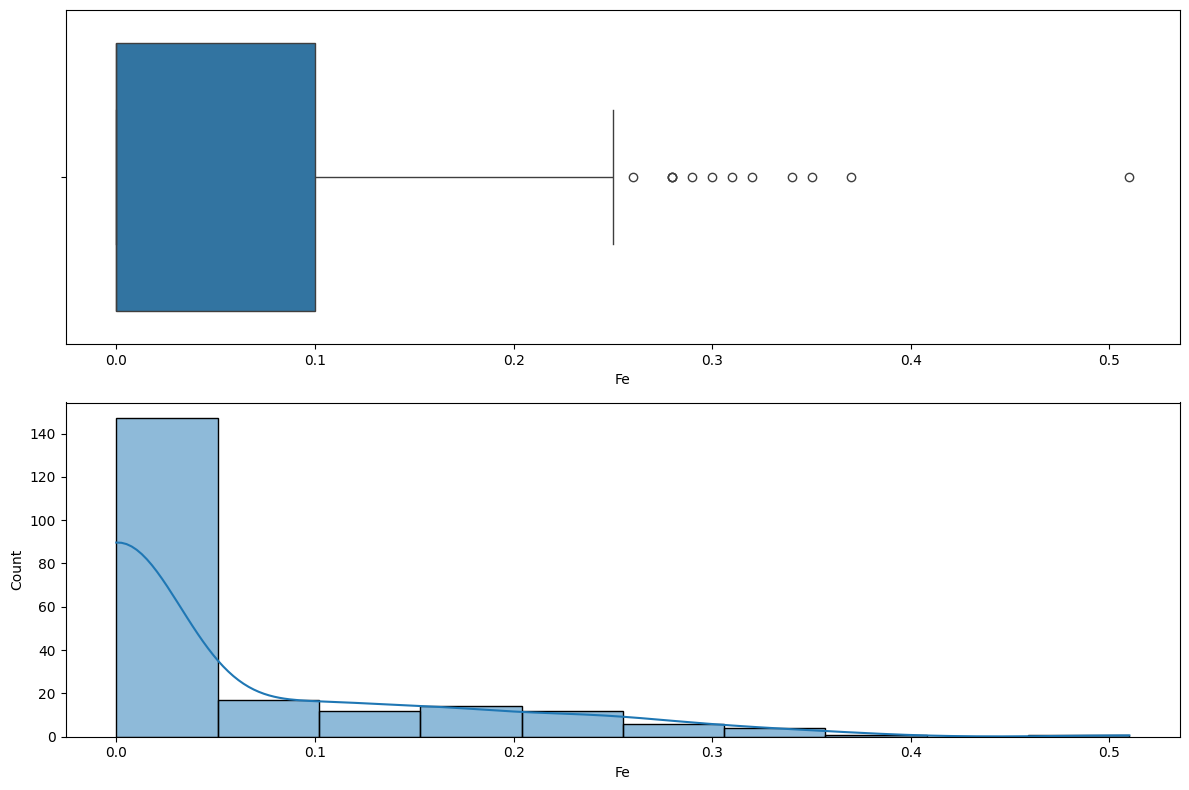

In [45]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.boxplot(x='Fe', data=df)
plt.subplot(2, 1, 2)
sns.histplot(df['Fe'], bins=10, kde=True)
plt.tight_layout()
plt.show()

- Большая доля нулевых значений указывает на ненормальное распределение.
- Максимальное значение (0.510000) является явным выбросом.

#### - 6.2 Исследуем признаки на наличие выбросов несколькими способами.

Один из способов удаления выбросов это создание справочника с допустимыми значениями элементов в стекле и использования его для удаления выбросов из данных. Данные возьмем из таких источников:

- "Introduction to Glass Science and Technology" by J.E. Shelby - книга, которая обсуждает различные аспекты производства и состава стекла.
- ISO 16293-1: Glass in building -- Basic soda-lime-silicate glass products - стандарт, который описывает химический состав и свойства строительного стекла.
- "Handbook of Materials for Product Design" by Charles A. Harper - содержит информацию о различных материалах, включая стекло, и их химическом составе.

например минимум 'Si' в (строительное стекло 2-класс) building_windows_float_processed 70 а максимум в headlamps (стекло для фар 7-класс) 75 тогда передаем
'Si': (70, 75),
и так по всем признакам

#### - 6.3 Удалим выбросы из данных и посчитаем процент удаленных записей от общего числа записей для каждого класса.

In [46]:
# Общий справочник диапазонов
combined_reference_ranges = {
    'RI': (1.50, 1.56),
    'Na': (10, 16),
    'Mg': (0.5, 4.5),
    'Al': (0.5, 3),
    'Si': (70, 75),
    'K': (0, 1),
    'Ca': (5, 12),
    'Ba': (0, 0.3),
    'Fe': (0, 0.3)
}

# Сохранение количества записей для каждого класса до удаления выбросов
initial_counts = data['Type'].value_counts()

# Функция для удаления строк с выбросами на основе общего справочника
def remove_outliers(data, combined_reference_ranges):
    for column, (min_val, max_val) in combined_reference_ranges.items():
        data = data[(data[column] >= min_val) & (data[column] <= max_val)]
    return data

# Удаление выбросов
cleaned_data = remove_outliers(data, combined_reference_ranges)

# Сохранение количества записей для каждого класса после удаления выбросов
final_counts = cleaned_data['Type'].value_counts()

# Подсчет процента удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")

Процент удаленных записей для каждого класса:
Класс 2: 15.79%
Класс 1: 7.14%
Класс 7: 93.10%
Класс 3: 5.88%
Класс 5: 76.92%
Класс 6: 33.33%


In [47]:
# Функция для удаления выбросов с использованием метода межквартильного размаха (IQR)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
    cleaned_data = data[~outliers]
    return cleaned_data

# Создаем копию исходных данных для очистки
cleaned_data_iqr = data.copy()

# Удаление выбросов с использованием метода межквартильного размаха (IQR)
cleaned_data_iqr = remove_outliers_iqr(cleaned_data_iqr)

# Получение количества записей для каждого класса после удаления выбросов
final_counts_iqr = cleaned_data_iqr['Type'].value_counts()

# Подсчет процента удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts_iqr.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")


Процент удаленных записей для каждого класса:
Класс 2: 27.63%
Класс 1: 15.71%
Класс 7: 100.00%
Класс 3: 11.76%
Класс 5: 84.62%
Класс 6: 44.44%


In [48]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Функция для обнаружения выбросов с использованием метода kNN
def detect_outliers_knn(X, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    k_distances = distances[:,-1]
    threshold = np.percentile(k_distances, 95)  # Определяем порог для выявления выбросов
    outliers = (k_distances > threshold).astype(int)  # Маркируем выбросы
    return outliers

# Функция для удаления выбросов с использованием метода kNN
def remove_outliers_knn(data, k=5):
    X = data.drop(columns=['Type']).values
    outliers = detect_outliers_knn(X, k)
    cleaned_data = data[outliers == 0]  # Оставляем только нормальные точки
    return cleaned_data

# Создаем копию исходных данных для очистки
cleaned_data_knn = data.copy()

# Удаление выбросов с использованием метода kNN (в данном случае k=5)
cleaned_data_knn = remove_outliers_knn(cleaned_data_knn, k=5)

# Создаем очищенный DataFrame
final_counts_knn = cleaned_data_knn['Type'].value_counts()

# Подсчитываем процент удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts_knn.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")

Процент удаленных записей для каждого класса:
Класс 2: 5.26%
Класс 1: 0.00%
Класс 7: 10.34%
Класс 3: 0.00%
Класс 5: 23.08%
Класс 6: 11.11%


In [49]:
from sklearn.svm import OneClassSVM

# Функция для обнаружения выбросов с использованием One-Class SVM
def detect_outliers_oneclasssvm(data, nu=0.1):
    model = OneClassSVM(kernel='rbf', nu=nu)
    X = data.drop(columns=['Type']).values
    model.fit(X)
    outliers = model.predict(X)
    return outliers

# Функция для удаления выбросов с помощью One-Class SVM
def remove_outliers_oneclasssvm(data, nu=0.1):
    outliers = detect_outliers_oneclasssvm(data, nu)
    cleaned_data = data[outliers == 1]  # Оставляем только "нормальные" точки
    return cleaned_data

# Создаем копию исходных данных для очистки
cleaned_data_oneclasssvm = data.copy()

# Удаление выбросов с использованием метода One-Class SVM
cleaned_data_oneclasssvm = remove_outliers_oneclasssvm(cleaned_data_oneclasssvm, nu=0.1)

# Получение количества записей для каждого класса после удаления выбросов
final_counts_oneclasssvm = cleaned_data_oneclasssvm['Type'].value_counts()

# Подсчет процента удаленных записей для каждого класса
print("Процент удаленных записей для каждого класса:")
for class_type in initial_counts.index:
    initial_count = initial_counts[class_type]
    final_count = final_counts_oneclasssvm.get(class_type, 0)  # Используем .get() для избежания ошибки KeyError
    removed_count = initial_count - final_count
    removed_percentage = (removed_count / initial_count) * 100
    print(f"Класс {class_type}: {removed_percentage:.2f}%")

Процент удаленных записей для каждого класса:
Класс 2: 13.16%
Класс 1: 2.86%
Класс 7: 17.24%
Класс 3: 0.00%
Класс 5: 30.77%
Класс 6: 22.22%


### Этап 7: Повторное обучение модели и оценка точности после обработки выбросов

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Создание переменных с признаками и целевой переменной для каждого метода очистки данных

# Для cleaned_data
X_cleaned_data = cleaned_data.drop('Type', axis=1)
y_cleaned_data = cleaned_data['Type']

# Разделение данных cleaned_data на обучающий и тестовый наборы
X_train_cleaned_data, X_test_cleaned_data, y_train_cleaned_data, y_test_cleaned_data = train_test_split(X_cleaned_data, y_cleaned_data, test_size=0.2, random_state=42)

# Создание и обучение модели RandomForestClassifier на очищенных данных cleaned_data
clf_cleaned_data = RandomForestClassifier(random_state=42)
clf_cleaned_data.fit(X_train_cleaned_data, y_train_cleaned_data)

# Оценка точности модели на обучающем наборе очищенных данных cleaned_data
train_accuracy_cleaned_data = clf_cleaned_data.score(X_train_cleaned_data, y_train_cleaned_data)

# Оценка точности модели на тестовом наборе очищенных данных cleaned_data
test_accuracy_cleaned_data = clf_cleaned_data.score(X_test_cleaned_data, y_test_cleaned_data)

# Добавляем метрики для модели на очищенных данных cleaned_data в таблицу
metrics_table.loc[2] = ['Модель на очищенных данных cleaned_data', train_accuracy_cleaned_data, test_accuracy_cleaned_data]

# Для cleaned_data_knn
X_cleaned_data_knn = cleaned_data_knn.drop('Type', axis=1)
y_cleaned_data_knn = cleaned_data_knn['Type']
X_train_cleaned_data_knn, X_test_cleaned_data_knn, y_train_cleaned_data_knn, y_test_cleaned_data_knn = train_test_split(X_cleaned_data_knn, y_cleaned_data_knn, test_size=0.2, random_state=42)
clf_cleaned_data_knn = RandomForestClassifier(random_state=42)
clf_cleaned_data_knn.fit(X_train_cleaned_data_knn, y_train_cleaned_data_knn)
train_accuracy_cleaned_data_knn = clf_cleaned_data_knn.score(X_train_cleaned_data_knn, y_train_cleaned_data_knn)
test_accuracy_cleaned_data_knn = clf_cleaned_data_knn.score(X_test_cleaned_data_knn, y_test_cleaned_data_knn)
metrics_table.loc[3] = ['Модель на очищенных данных cleaned_data_knn', train_accuracy_cleaned_data_knn, test_accuracy_cleaned_data_knn]

# Для cleaned_data_oneclasssvm
X_cleaned_data_oneclasssvm = cleaned_data_oneclasssvm.drop('Type', axis=1)
y_cleaned_data_oneclasssvm = cleaned_data_oneclasssvm['Type']
X_train_cleaned_data_oneclasssvm, X_test_cleaned_data_oneclasssvm, y_train_cleaned_data_oneclasssvm, y_test_cleaned_data_oneclasssvm = train_test_split(X_cleaned_data_oneclasssvm, y_cleaned_data_oneclasssvm, test_size=0.2, random_state=42)
clf_cleaned_data_oneclasssvm = RandomForestClassifier(random_state=42)
clf_cleaned_data_oneclasssvm.fit(X_train_cleaned_data_oneclasssvm, y_train_cleaned_data_oneclasssvm)
train_accuracy_cleaned_data_oneclasssvm = clf_cleaned_data_oneclasssvm.score(X_train_cleaned_data_oneclasssvm, y_train_cleaned_data_oneclasssvm)
test_accuracy_cleaned_data_oneclasssvm = clf_cleaned_data_oneclasssvm.score(X_test_cleaned_data_oneclasssvm, y_test_cleaned_data_oneclasssvm)
metrics_table.loc[4] = ['Модель на очищенных данных cleaned_data_oneclasssvm', train_accuracy_cleaned_data_oneclasssvm, test_accuracy_cleaned_data_oneclasssvm]


# Для cleaned_data_iqr
X_cleaned_data_iqr = cleaned_data_iqr.drop('Type', axis=1)
y_cleaned_data_iqr = cleaned_data_iqr['Type']
X_train_cleaned_data_iqr, X_test_cleaned_data_iqr, y_train_cleaned_data_iqr, y_test_cleaned_data_iqr = train_test_split(X_cleaned_data_iqr, y_cleaned_data_iqr, test_size=0.2, random_state=42)
clf_cleaned_data_iqr = RandomForestClassifier(random_state=42)
clf_cleaned_data_iqr.fit(X_train_cleaned_data_iqr, y_train_cleaned_data_iqr)
train_accuracy_cleaned_data_iqr = clf_cleaned_data_iqr.score(X_train_cleaned_data_iqr, y_train_cleaned_data_iqr)
test_accuracy_cleaned_data_iqr = clf_cleaned_data_iqr.score(X_test_cleaned_data_iqr, y_test_cleaned_data_iqr)
metrics_table.loc[5] = ['Модель на очищенных данных cleaned_data_iqr', train_accuracy_cleaned_data_iqr, test_accuracy_cleaned_data_iqr]

# В конце выведем обновленную таблицу метрик
metrics_table.sort_values(by='Точность на тестовом наборе', ascending=False)


,Модель,Точность на обучающем наборе,Точность на тестовом наборе
0,Модель до undersampling,1.0,0.837209
3,Модель на очищенных данных cleaned_data_knn,1.0,0.804878
2,Модель на очищенных данных cleaned_data,1.0,0.781250
5,Модель на очищенных данных cleaned_data_iqr,1.0,0.750000
1,Модель после undersampling,1.0,0.727273
4,Модель на очищенных данных cleaned_data_onecla...,1.0,0.692308


### Этап 8: Сформулировать выводы по проделанной работе

#### - 8.1 Преобразования, проведенные с данными.

1. Уменьшение представленных классов с использованием RandomUnderSampler:
   - Провели undersampling для балансировки классов в данных путём снижения количества записей в более многочисленных классах до уровня менее многочисленных.

2. Удаление выбросов:
   - Применены различные методы для выявления и удаления выбросов:
     - Разработка и использование справочника допустимых значений для элементов стекла: На основе справочных книг и стандартов составлен список допустимых диапазонов значений для каждого элемента.
     - Метод межквартильного размаха (IQR): Выбросы удалены на основе межквартильного размаха.
     - Метод k-ближайших соседей (kNN): Использован kNN для удаления выбросов.
     - Метод One-Class SVM: One-Class SVM использовался для идентификации и удаления выбросов.

3. Обучение моделей RandomForestClassifier:
   - Обучение модели RandomForestClassifier как на исходных данных, так и на данных после различных методов обработки выбросов.

#### - 8.2 Сравните точность моделей: до и после обработки выбросов

- Модель до undersampling на исходных данных показала наилучшую точность на тестовом наборе (83.72%) по сравнению со всеми другими методами. Это означает, что без удаления выбросов и балансировки классов модель работает лучше в данном конкретном случае.
- Модель после undersampling: показывает точность 72.73% на тестовом наборе, что ниже, чем точность модели до undersampling.
  
Методы удаления выбросов показали неоднозначные результаты в контексте улучшения точности моделей:
- Модель на данных после удаления выбросов методом kNN: точность 80.49% на
- Модель на данных после удаления выбросов на основе справочника: точность 78.13%

Метод удаления выбросов kNN и справочник дали точность ниже, чем Модель до undersampling на исходных данных.

- Модель на данных после использования IQR: точность 75%
- Модель на данных после One-Class SVM: точность 69.23%, самая низкая точность.


Несмотря на то, что модель на очищенных данных cleaned_data удалила больше выбросов, она показала лучшие результаты, чем модель One-Class SVM. Это объясняется следующими факторами:
- Качество данных: Метод справочника основывался на допустимых диапазонах значений из справочников и стандартов, что обеспечивает более объективное удаление выбросов, связанных с ошибками или неправильными значениями.
- Шум в данных: Если выбросы действительно являются ошибочными или нерациональными данными, их удаление может улучшить качество данных и, как следствие, производительность модели.
- Эффективное удаление выбросов: Более агрессивное удаление выбросов (в случае большего процента удаленных данных) может быть оправдано, если оставшиеся данные лучше представляют распределение истинных значений.


Во всех рассмотренных моделях точность на обучающем наборе была 100%. Это свидетельствует о переобучении, когда модель идеально предсказывает метки для обучающих данных, но теряет обобщающую способность на новых данных.

#### - 8.3 Мнение о необходимости исследования данных на выбросы, плюсы и минусы

Плюсы исследования данных на выбросы:
- Повышение качества данных: Выявление и удаление выбросов может улучшить качество данных, что приводит к более точным и надежным моделям.
- Повышение производительности модели: Модели, обученные на данных без выбросов, могут показывать лучшую производительность на тестовых наборах.
- Значимая интерпретируемость: Данные без выбросов могут быть более легко интерпретированы и могут дать более значимые результаты.

Минусы исследования данных на выбросы:
- Потеря данных: Удаление выбросов может привести к значительной потере данных, особенно если данные уже дефицитны.
- Сложность выбора метода удаления: Разные методы удаления выбросов могут подходить для разных наборов данных. Неправильно выбранный метод может ухудшить качество модели.
- Потенциальная потеря полезной информации: Не все выбросы являются шумом; некоторые из них могут содержать важные сигналы, которые могут улучшить производительность модели, если их правильно обработать.